# Normal Equation

## Packages ##

Let's first import all the packages that you will need.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- Sqrt returns the square root of x for x > 0

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

##### Then Create 2 array for x and y cordinator

[-2.  -1.   0.   1.   2.   3.   4.   4.5]
[12.   4.5  1.5  0.   0.   2.8  8.4 10.8]


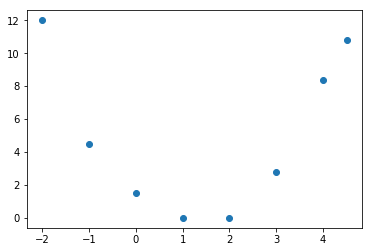

In [3]:
x = np.array([-2,-1,0,1,2,3,4,4.5])
y = np.array([12,4.5,1.5,0,0,2.8,8.4,10.8])
print(x)
print(y)

plt.plot(x,y, "o")
plt.show()


#### with using function f(x) = a + bx + cx2 we are able to plot our curve, we just need best aproximate value for a, b, c

In [4]:
def fx(x, a, b, c):
    B = (b*x)
    C = c*(x**2)
    fx = a + B + C
    return fx

##### with ploting some random numbers for a,b,c in f(x) = a + bx + cx2  we can see how our plot can change

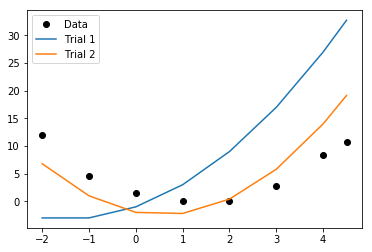

In [5]:
plt.plot(x, y, "ko", label="Data")

trial1 = fx(x, -1, 3, 1)
trial2 = fx(x, -2, -1.6, 1.4)

plt.plot(x, trial1, "-", label="Trial 1")
plt.plot(x, trial2, "-", label="Trial 2")
plt.legend()

#### In data fitting we need vondermond Matrix in bellow I want to make this martix
#### the first column has 1
#### the second column is our x 
#### the third column is our x**2

In [6]:
X = np.column_stack([[1,1,1,1,1,1,1,1],x,x**2])
print(X)

[[ 1.   -2.    4.  ]
 [ 1.   -1.    1.  ]
 [ 1.    0.    0.  ]
 [ 1.    1.    1.  ]
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 [ 1.    4.   16.  ]
 [ 1.    4.5  20.25]]


#### We want to Calculate Normal Equations Method so we need to calculate AT * A = LT * L 
##### (X is A in our code)

In [7]:
xt = X.T
xt

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [-2.  , -1.  ,  0.  ,  1.  ,  2.  ,  3.  ,  4.  ,  4.5 ],
       [ 4.  ,  1.  ,  0.  ,  1.  ,  4.  ,  9.  , 16.  , 20.25]])

### after that we want to calculate xt*x , 
#### Here I write 3 for loop for product of matrix to show how product in matrix work but I use "(np.dot)" in my code to calculate the product of two matrix

In [8]:
res = np.zeros([3,3])

for i in range(len(xt)):
    for j in range(len(X[0])):
        for k in range(len(X)):
            res[i][j] += xt[i][k] * X[k][j]

for r in res:
    print(np.array(r))

[ 8.   11.5  55.25]
[ 11.5    55.25  182.125]
[ 55.25   182.125  781.0625]


#### I use np.dot for X*XT that give us the same result 

In [9]:
xtx = np.dot(xt,X)
xtx

array([[  8.    ,  11.5   ,  55.25  ],
       [ 11.5   ,  55.25  , 182.125 ],
       [ 55.25  , 182.125 , 781.0625]])

##### Calculate XT * B ( Y is B in our code )

In [10]:
xtb = np.dot(xt,y)
xtb

array([ 40. ,  62.1, 430.8])

#### We know that we can find AT * A = LT * L  so to found L we Can use Cholesky Factorization 

In [11]:
def cholesky_factorization(A):

    n = len(A)

    List = [[0.0] * n for i in range(n)]

    for i in range(n):
        for m in range(i+1):
            tmp_sum = sum(List[i][j] * List[m][j] for j in range(m))
            if (i == m):
                List[i][m] = sqrt(A[i][i] - tmp_sum)
            else:
                List[i][m] = (1.0 / List[m][m] * (A[i][m] - tmp_sum))
    return List

In [12]:
L = cholesky_factorization(xtx)
L = np.array(L)
L

# we also can use build in function for cholesky, you can run the code bellow.
#L =np.linalg.cholesky(x)
#L

array([[ 2.82842712,  0.        ,  0.        ],
       [ 4.06586399,  6.22243923,  0.        ],
       [19.53382483, 16.50528373, 11.27243526]])

In [13]:
LT = L.T
LT

array([[ 2.82842712,  4.06586399, 19.53382483],
       [ 0.        ,  6.22243923, 16.50528373],
       [ 0.        ,  0.        , 11.27243526]])

##### Know we should calculate L*z = xtb ( With linalg.solve) which gives us the value of Z

In [14]:
z = np.linalg.solve(L,xtb)
z

array([14.14213562,  0.73925993, 12.62799935])

##### Know we should calculate LT  * X = xtb which give us the value of X . The first element of X is our a, second is our b, and third one is our c

In [15]:
abc = np.linalg.solve(LT,z)
abc

array([ 1.36402228, -2.85271775,  1.12025477])

In [16]:
a=abc[0]
b=abc[1]
c=abc[2]

print('f(x) = ' + str(a) + ' + ' + str(b) + " X " + " + " +str(c)+" X**2 ")

f(x) = 1.3640222755768938 + -2.852717753768176 X  + 1.1202547685740971 X**2 


#### finally we can set these number into our function fx and plot the curve that we want

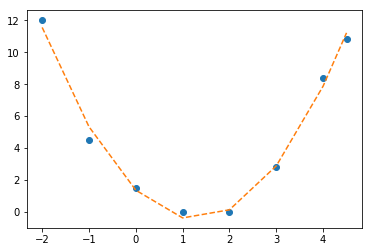

In [19]:
plt.plot(x, y, "o", label="Data")

f_x = fx(x,  a, b, c)

plt.plot(x, f_x, "--", label="approximate")
plt.show()

### this is the picture from "https://www.desmos.com/calculator" this website which can help us to plot our point and curve

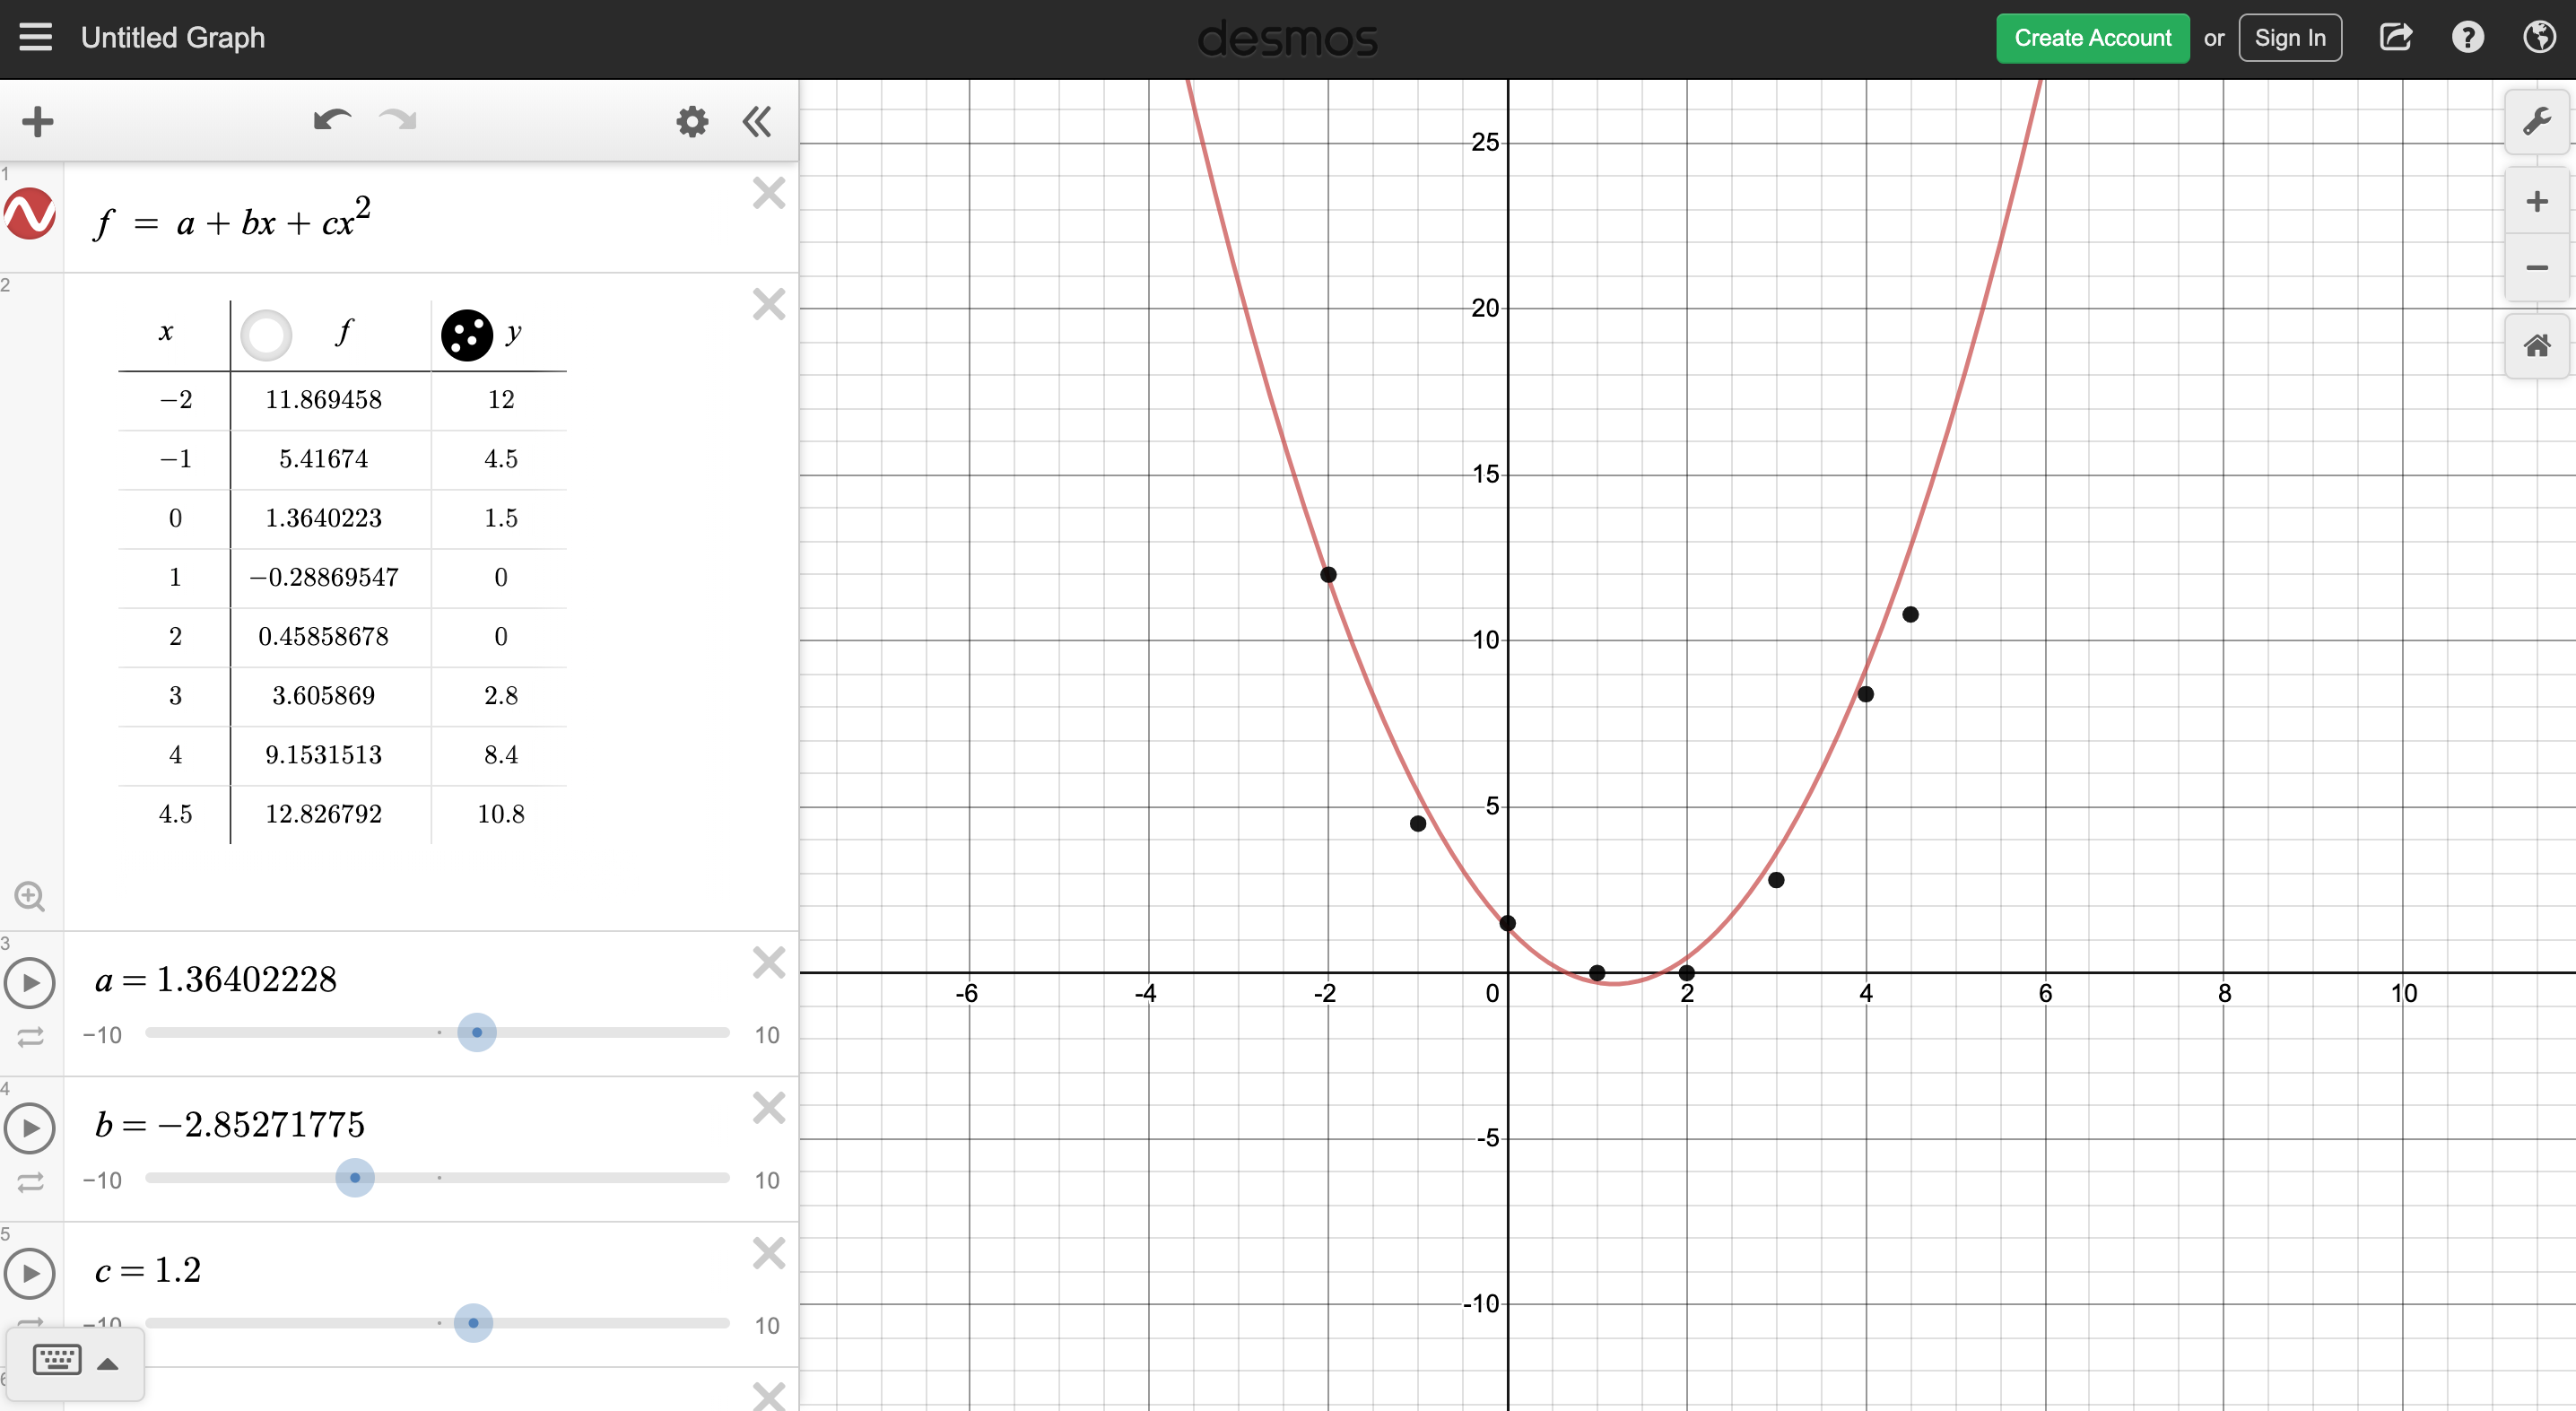

In [450]:
from PIL import Image 
img = Image.open("picture.png")
img